In [1]:
#Import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset

data = pd.read_excel('ANZ_synthesised_transaction_dataset.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [4]:
data.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


### Basic check

In [5]:
print("Unique customer ID's: ", data.customer_id.nunique())

Unique customer ID's:  100


In [6]:
print("Rows of dataset: ", len(data))
print("Unique transaction ID's: ", data.transaction_id.nunique())

Rows of dataset:  12043
Unique transaction ID's:  12043


In [7]:
data.date.describe()

<ipython-input-7-2cb626a5e644>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [8]:
pd.date_range(start="2018-08-01", end="2018-10-31").difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

Based on the basic check, we can conclude:
1. We have 100 customers (based on 100 unique customer id's)
2. Each rows of dataset represent a single transaction, which there is no duplicate transaction
3. We have 3 months period of data, which starts from 01/08/2018 to 31/10/2018
4. With 91 unique days, it means we have 1 missing day (on 16/08/2018)

#### Missing values

In [9]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
#Missing values

missing_data = pd.DataFrame({'Total missing': data.isnull().sum(), 'Percentage missing': (data.isnull().sum())/12043*100})
missing_data

,Total missing,Percentage missing
status,0,0.000000
card_present_flag,4326,35.921282
bpay_biller_code,11158,92.651333
account,0,0.000000
currency,0,0.000000
long_lat,0,0.000000
txn_description,0,0.000000
merchant_id,4326,35.921282
merchant_code,11160,92.667940
first_name,0,0.000000


### Exploratory Data Analysis

In [11]:
#Status
data.status.value_counts(dropna=False)

authorized    7717
posted        4326
Name: status, dtype: int64

I guess "authorized" means the transactions already approved, which have almost 8000 transaction. And "posted" means the transaction still needs more process of verified, which have around 4000 transaction 

In [12]:
#Card present flag
data.card_present_flag.value_counts(dropna=False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

Around 4000 rows is null values.

Based on CNP definition (https://squareup.com/us/en/townsquare/what-is-a-card-not-present-transaction): it means transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It’s most common for orders that happen remotely — over the phone or by fax, internet, or mail.

In [13]:
#Currency
data.currency.value_counts(dropna=False)

AUD    12043
Name: currency, dtype: int64

All the rows represent around 12000 transaction already executed in Australian Dollars. Actually it doesn't provide any additional information so it's not a big deal to drop this column

In [14]:
#Transaction description
data.txn_description.value_counts(dropna=False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of transaction')

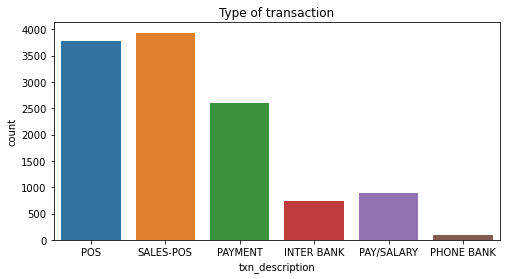

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data.txn_description)
plt.title("Type of transaction")

It shows mostly consists of sales payment (sales-pos and pos)

In [16]:
data[["txn_description", "amount"]].groupby("txn_description", as_index=False).mean().sort_values(by="amount", ascending=False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

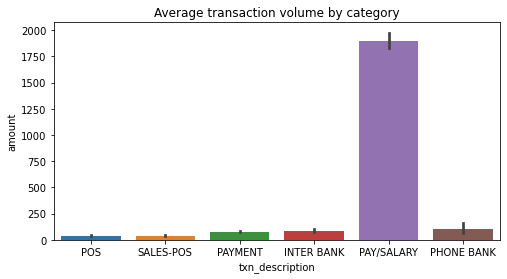

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x="txn_description", y="amount", data=data)
plt.title("Average transaction volume by category")

Pay/salary is significantly higher than all the other categories, and it seems quite make sense

In [18]:
#Gender
data.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transaction by gender')

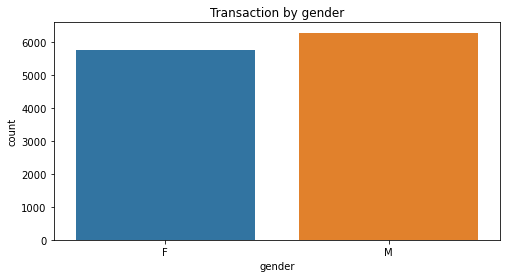

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(data.gender)
plt.title("Transaction by gender")

We have around 6200 data of male and around 5700 data of female

In [20]:
#Merchant suburb
data.merchant_suburb.value_counts(dropna=False)

NaN                4326
Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
                   ... 
Warilla               1
Lewisham              1
Karnup                1
Byford                1
Cumberland Park       1
Name: merchant_suburb, Length: 1610, dtype: int64

In [21]:
#Merchant state
data.merchant_state.value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transaction by state')

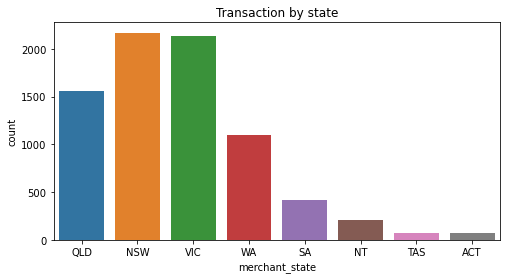

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(data.merchant_state)
plt.title("Transaction by state")

New south wales (NSW) and Victoria (VIC) are the top 2 states in number of transactions

In [23]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index=False).mean().sort_values(by="amount", ascending=False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

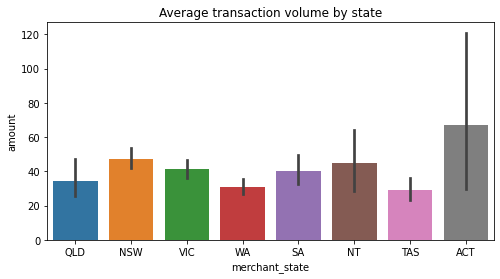

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x="merchant_state", y="amount", data=data)
plt.title("Average transaction volume by state")

The variance of ACT is quite large, but it has the highest average transaction volume

In [25]:
#Country
data.country.value_counts(dropna=False)

Australia    12043
Name: country, dtype: int64

All rows shows us that all transaction recorded within Australia. Since it doesn't provide any information, it's possible to drop this column (similar with currency column)

In [26]:
#Movement
data.movement.value_counts(dropna=False)

debit     11160
credit      883
Name: movement, dtype: int64

Basicallt it's just label for payment mathod

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transaction by movement')

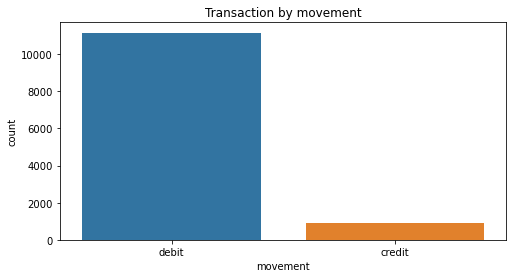

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(data.movement)
plt.title("Transaction by movement")

Most of the transaction actually done via a debit card with more than 10000 transactions

Text(0.5, 1.0, 'Average transaction volume by movement')

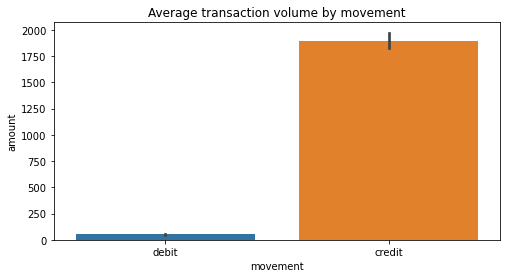

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x="movement", y="amount", data=data)
plt.title("Average transaction volume by movement")

We can see that the transaction amount of credit card is significantly higher than debit card. So it's quite make sense, for example if we're trying to buy expensive things it typically use credit card for these transaction 

Text(0.5, 1.0, 'Balance distribution')

<Figure size 576x288 with 0 Axes>

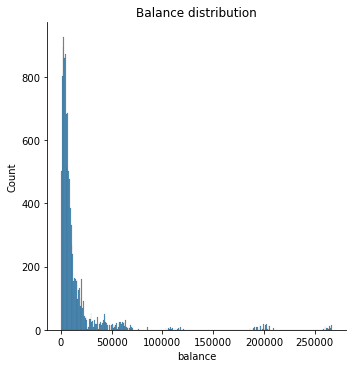

In [29]:
#Balance
plt.figure(figsize=(8,4))
sns.displot(data.balance)
plt.title("Balance distribution")

We can see that distribution of the balance feature has quite a long tail

Text(0.5, 1.0, 'Age distribution')

<Figure size 576x288 with 0 Axes>

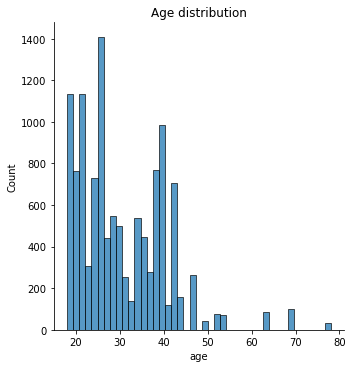

In [30]:
#Age of customers
plt.figure(figsize=(8,4))
sns.displot(data.age)
plt.title("Age distribution")

Most of the customers belong in the 20-25 age bracket

### Feature selection

#### Drop unrelated columns

As mentioned in data exploration section, "currency" and "country" doesn't give us any additional information, so it's possible to not use these columns

In [31]:
data = data.drop(["currency", "country"], axis=1)
print("Total data after drop the column: ", data.shape)

Total data after drop the column:  (12043, 21)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   merchant_code      883 non-null    float64       
 8   first_name         12043 non-null  object        
 9   balance            12043 non-null  float64       
 10  date               12043 non-null  datetime64[ns]
 11  gender             12043 non-null  object        
 12  age                12043 non-null  int64         
 13  merchant_suburb    7717 non-null   object        
 14  mercha

#### Handling missing values

In [33]:
#Missing values

missing_data = pd.DataFrame({'Total missing': data.isnull().sum(), 'Percentage missing': (data.isnull().sum())/12043*100})
missing_data

,Total missing,Percentage missing
status,0,0.000000
card_present_flag,4326,35.921282
bpay_biller_code,11158,92.651333
account,0,0.000000
long_lat,0,0.000000
txn_description,0,0.000000
merchant_id,4326,35.921282
merchant_code,11160,92.667940
first_name,0,0.000000
balance,0,0.000000


Using loc function to filter out transactions that are not purchases-related

In [34]:
notSales = data.loc[(data.txn_description != "SALES_POS") | (data.txn_description != "POS"), :]
notSales.isnull().sum().sort_values(ascending=False) 

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

It represents that all the missing values coming from 7 columns before are transactions not related to sales. We can conclude that all those missing values exist because those transactions don't involve to merchant

In [35]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a", inplace=True)

In [36]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(ascending=False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

"merchant_code" and "bpay_biller_code" are significantly have missing values, which more than 90%. So it will dropped from the data

In [37]:
data = data.drop(["merchant_code", "bpay_biller_code"], axis=1)

In [38]:
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

#### Feature for timeseries

In [39]:
daily = pd.DataFrame(data.groupby("date").amount.sum())
daily.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Date')

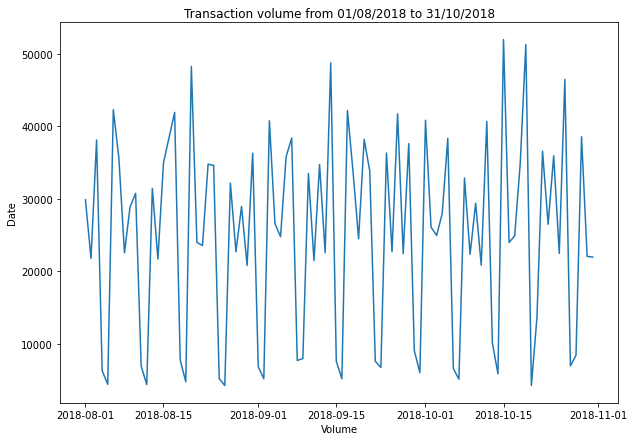

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(daily.index, daily.amount)
plt.title("Transaction volume from 01/08/2018 to 31/10/2018")
plt.xlabel("Volume")
plt.ylabel("Date")

It seems like a cyclical pattern, i guess people tend to spend more during the weekends

In [41]:
#Data extraction date
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [42]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [43]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [44]:
data["hour"] = [time.split(":")[0] for time in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


### Deep into feature

In [45]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,01


#### Purchases amount

In [46]:
purchases = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchases.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase amount')

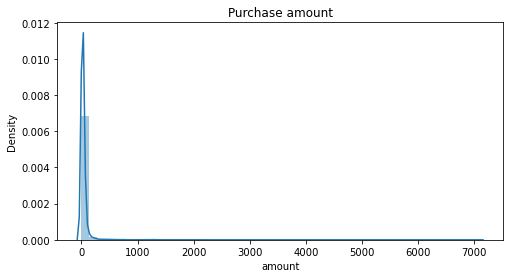

In [47]:
plt.figure(figsize=(8,4))
sns.distplot(purchases)
plt.title("Purchase amount")

The distribution sort of levels ofthen has quite a long tail. SO, let's try to compater the purchases amount with overall amount (it includes salary payment, bank transfer, etc)

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall amount')

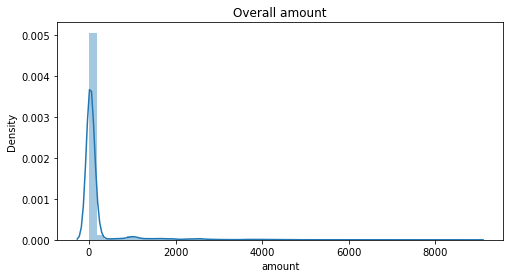

In [48]:
plt.figure(figsize=(8,4))
sns.distplot(data.amount)
plt.title("Overall amount")

In [49]:
data.describe()

,balance,age,amount,month,dayofweek
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588,9.011957,3.085029
std,31503.722652,10.046343,592.599934,0.816511,1.890169
min,0.240000,18.000000,0.100000,8.000000,0.000000
25%,3158.585000,22.000000,16.000000,8.000000,2.000000
50%,6432.010000,28.000000,29.000000,9.000000,3.000000
75%,12465.945000,38.000000,53.655000,10.000000,5.000000
max,267128.520000,78.000000,8835.980000,10.000000,6.000000


Variance in overall amount is significantly higher than purchases amount due to the inclusion of salary payments (the standard deviation is quite higher)

#### Transaction volume each customers

In [50]:
cust_month = pd.DataFrame(data.groupby("customer_id").amount.sum()/3)
cust_month.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


It divided into 3 because we have 3 months of transaction

C:\Users\ESTHER YOLANDA T\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers monthly transaction')

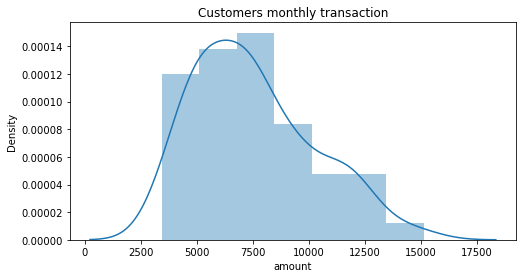

In [51]:
plt.figure(figsize=(8,4))
sns.distplot(cust_month.amount)
plt.title("Customers monthly transaction")

#### Transaction volume over time

Text(0.5, 1.0, 'Average monthly transaction volume')

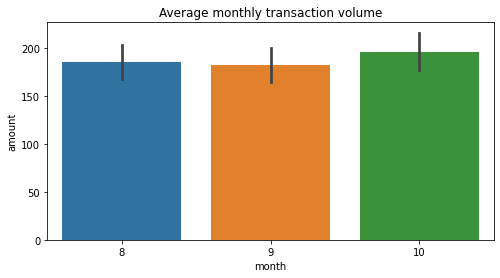

In [52]:
plt.figure(figsize = (8, 4))
sns.barplot(x = "month", y = "amount", data = data)
plt.title("Average monthly transaction volume")

In [55]:
average_daily = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day')

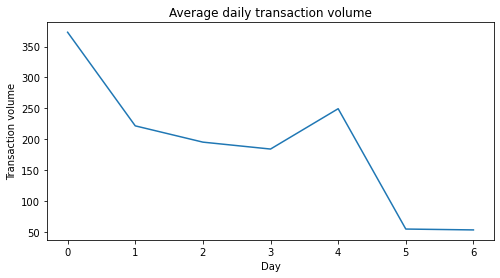

In [56]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(average_daily.index, average_daily.amount)
plt.title("Average daily transaction volume")
plt.ylabel("Transaction volume")
plt.xlabel("Day")

It seems that friday and saturday have the lowest average transaction

In [57]:
data.to_pickle("C:/Users/ESTHER YOLANDA T/data.pk1")